In [63]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
import pickle
import os

%matplotlib inline

In [104]:
images = glob.glob('./camera_cal/calibration*.jpg')

In [105]:
# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((6*9,3), np.float32)
objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.
outimages = []
originalImages = []

for fname in images:
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (9,6),None)

    # If found, add object points, image points
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)

        # Draw and display the corners
        img_points = cv2.drawChessboardCorners(img.copy(), (9,6), corners, ret)
        
        outimages.append(img_points)
        originalImages.append(img)
     
print(len(outimages))

17


Text(0.5, 1.0, 'With points')

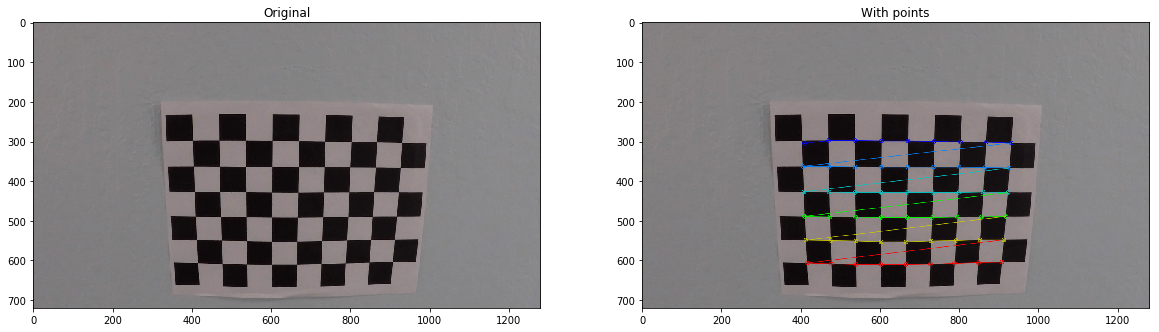

In [106]:
index = 14
original = originalImages[index]
chessPoints = outimages[index]

fig, axes = plt.subplots(ncols=2, figsize=(20, 10))
axes[0].imshow(original)
axes[0].set_title('Original')
axes[1].imshow(chessPoints)
axes[1].set_title('With points')
#plt.show()

In [107]:
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, original.shape[0:2], None, None)

In [108]:
undist = cv2.undistort(original, mtx, dist, None, mtx)

Text(0.5, 1.0, 'Undistort')

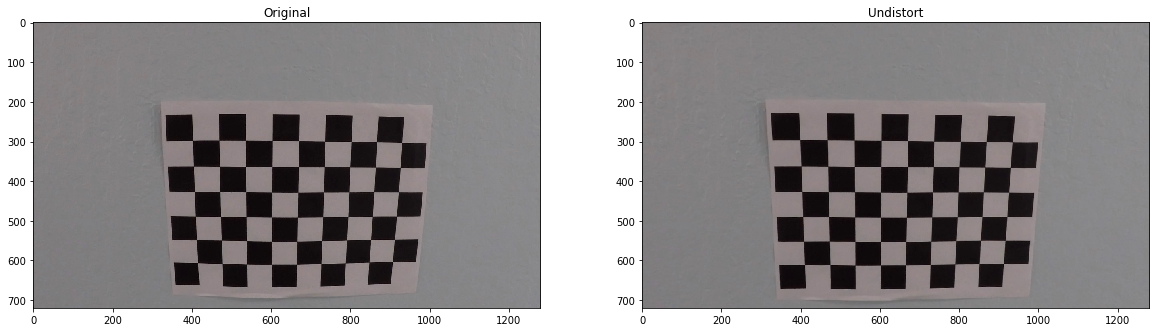

In [109]:
fig, axes = plt.subplots(ncols=2, figsize=(20, 10))
axes[0].imshow(original)
axes[0].set_title('Original')
axes[1].imshow(undist)
axes[1].set_title('Undistort')

In [61]:
pickle.dump( { 'mtx': mtx, 'dist': dist }, open('./pickle_store/camera_calibration.p', 'wb'))

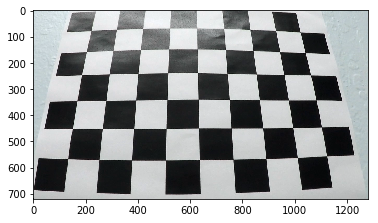

In [90]:
test_image = os.listdir("camera_cal/")[9]
image = cv2.imread("camera_cal/"+ test_image)
plt.imshow(image)

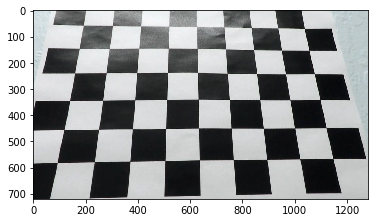

In [110]:
undist1 = cv2.undistort(image, mtx, dist, None, mtx)
plt.imshow(undist1)

In [111]:
plt.imsave("output_steps/"+'original_chess_cal', image)
plt.imsave("output_steps/"+'Distortion_corrected_cal', undist1)